# Exploratory Data Analysis (EDA)  with Earthquake Data

In the realm of data analysis and machine learning, it is essential to embark on a journey of data exploration and understanding before applying sophisticated algorithms. This process is known as Exploratory Data Analysis (EDA) and forms the foundation for making informed decisions, building predictive models, and uncovering valuable insights from datasets.

In this code, we dive into the world of earthquake data collected over the years, ranging from 1990 to 2023. Our objective is to perform a comprehensive EDA on this dataset, gaining insights into earthquake occurrences, their magnitudes, locations, and various other attributes. We'll also utilize machine learning techniques to understand which factors contribute most to the magnitude of earthquakes.

### Dataset Used

https://www.kaggle.com/datasets/alessandrolobello/the-ultimate-earthquake-dataset-from-1990-2023

### Libraries and Tools

Before delving into the data analysis, we need to set up our environment and import the necessary libraries and tools. These include:

- **Pandas**: For data manipulation and analysis.
- **Matplotlib** and **Seaborn**: For data visualization.
- **Plotly**: A powerful library for interactive visualizations.
- **Missingno**: For visualizing missing data.
- **WordCloud**: For generating word clouds.
- **Scikit-Learn**: For machine learning tasks.
- **Google Colab**: To upload and work with data in a Google Colab environment.


### Data Loading and Initial Exploration

The first step is to load our earthquake dataset from a CSV file, assuming it's named 'Earthquakes-1990-2023.csv.' We display the initial few rows, check its shape, list column names, and generate summary statistics for both numerical and categorical columns.

We also examine data types and look for missing values within the dataset, ensuring a solid understanding of its structure.

### Data Preprocessing

Data preprocessing is crucial to ensure the data is in a usable format for analysis. Key preprocessing steps in this code include:

- Identifying and removing duplicate rows to avoid redundancy.
- Converting date and time columns into the appropriate datetime format.
- Filtering earthquake data based on specific criteria, such as magnitude or location (e.g., California, Alaska, Nevada, and Washington).
- Transforming date columns into additional features like hour, day of the month, weekday, month, month name, and year.

### Exploratory Data Analysis (EDA)

The core of this code is dedicated to EDA, where we explore and visualize various aspects of the earthquake data:

- **Magnitude Analysis**: We analyze earthquake magnitudes over time, by hour, and in specific regions.
- **Temporal Trends**: We investigate how earthquake occurrences and magnitudes vary by year, month, and day of the month.
- **Top Locations**: We identify the top earthquake locations and visualize their distribution.
- **Data Types and Statuses**: We examine the distribution of earthquake data types and statuses.

### Correlation Analysis

To gain insights into what factors might be correlated with earthquake magnitudes, we calculate the correlation matrix between numerical features and visualize it as a heatmap. Additionally, we identify the top features most positively and negatively correlated with earthquake magnitudes.


# Installing Libraries

In [ ]:
# Install required packages
!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.3/357.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 28.1 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=1e19f29a0daad37e7d3d8344d0e06c81d33c9b6260d00da7f9e5bf109b697cfa
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.2.1
    Uninstalling pydantic-2.2.1:
      Successfully uninstalled pydantic-2.2.1


In [ ]:
#import necessary libraries
import numpy as np
import pandas as pd
import shapely
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import missingno as mno
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.io as pio
from wordcloud import WordCloud
color_pal = sns.color_palette()
plt.style.use('seaborn-dark-palette')
plt.style.use('dark_background')

import nltk

import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='colorblind')
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#Model
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

<ipython-input-2-cdb3970c9330>:15: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



# Data Loading

In [ ]:
# Upload data (assumed to be in a file named 'Eartquakes-1990-2023.csv')
from google.colab import files
uploaded = files.upload()

In [ ]:
# Read the CSV data into a DataFrame
df = pd.read_csv('Eartquakes-1990-2023.csv')

# Initial Exploration

In [ ]:
# Display the first few rows of the DataFrame
df.head()

,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
0,631153353990,"12 km NNW of Meadow Lakes, Alaska",reviewed,0,96,earthquake,2.50,Alaska,-149.669200,61.730200,30.100,1990-01-01 00:22:33.990000+00:00
1,631153491210,"14 km S of Volcano, Hawaii",reviewed,0,31,earthquake,1.41,Hawaii,-155.212333,19.317667,6.585,1990-01-01 00:24:51.210000+00:00
2,631154083450,"7 km W of Cobb, California",reviewed,0,19,earthquake,1.11,California,-122.806167,38.821000,3.220,1990-01-01 00:34:43.450000+00:00
3,631155512130,"11 km E of Mammoth Lakes, California",reviewed,0,15,earthquake,0.98,California,-118.846333,37.664333,-0.584,1990-01-01 00:58:32.130000+00:00
4,631155824490,"16km N of Fillmore, CA",reviewed,0,134,earthquake,2.95,California,-118.934000,34.546000,16.122,1990-01-01 01:03:44.490000+00:00


In [ ]:
# Check the shape (number of rows and columns) of the DataFrame
df.shape

(14449, 12)

In [ ]:
# List column names
df.columns

Index(['time', 'place', 'status', 'tsunami', 'significance', 'data_type',
       'magnitudo', 'state', 'longitude', 'latitude', 'depth', 'date'],
      dtype='object')

In [ ]:
# Generate summary statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
time,14449.0,6.349934e+11,1.976885e+09,6.311534e+11,6.332618e+11,6.353605e+11,6.364891e+11,6.383199e+11
tsunami,14449.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
significance,14449.0,7.336805e+01,1.012225e+02,0.000000e+00,1.400000e+01,3.600000e+01,7.400000e+01,8.890000e+02
magnitudo,14449.0,1.821139e+00,1.205495e+00,-8.000000e-01,9.400000e-01,1.530000e+00,2.200000e+00,7.600000e+00
longitude,14448.0,-1.002461e+02,6.910433e+01,-1.799450e+02,-1.224888e+02,-1.189337e+02,-1.176950e+02,1.797060e+02
latitude,14448.0,3.578137e+01,1.478392e+01,-6.230700e+01,3.415600e+01,3.760258e+01,3.881954e+01,7.972800e+01
depth,14448.0,1.564012e+01,4.445562e+01,-3.400000e+00,3.182000e+00,5.916000e+00,1.000000e+01,6.806000e+02


In [ ]:
# Generate summary statistics for categorical (object) columns
df.describe(include="object").T

,count,unique,top,freq
place,14449,5843,"3 km E of Mammoth Lakes, California",611
status,14449,2,reviewed,14446
data_type,14449,4,earthquake,14035
state,14449,228,California,6539
date,14448,13831,1990-03-01 14:43:53.970000+00:00,2


In [ ]:
# Display data types of columns
df.dtypes

time              int64
place            object
status           object
tsunami           int64
significance      int64
data_type        object
magnitudo       float64
state            object
longitude       float64
latitude        float64
depth           float64
date             object
dtype: object

In [ ]:
# Display information about the DataFrame, including non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14449 entries, 0 to 14448
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   time          14449 non-null  int64  
 1   place         14449 non-null  object 
 2   status        14449 non-null  object 
 3   tsunami       14449 non-null  int64  
 4   significance  14449 non-null  int64  
 5   data_type     14449 non-null  object 
 6   magnitudo     14449 non-null  float64
 7   state         14449 non-null  object 
 8   longitude     14448 non-null  float64
 9   latitude      14448 non-null  float64
 10  depth         14448 non-null  float64
 11  date          14448 non-null  object 
dtypes: float64(4), int64(3), object(5)
memory usage: 1.3+ MB


In [ ]:
# Count unique values in each column
unique_values = df.nunique()
unique_values

time            13832
place            5843
status              2
tsunami             1
significance      232
data_type           4
magnitudo         399
state             228
longitude        9292
latitude         8610
depth            7826
date            13831
dtype: int64

In [ ]:
# Check for missing values and count them in each column
df.isna().sum()

time            0
place           0
status          0
tsunami         0
significance    0
data_type       0
magnitudo       0
state           0
longitude       1
latitude        1
depth           1
date            1
dtype: int64

# Data Cleaning and Manupulation

In [ ]:
# Finding duplicate rows
duplicate_rows = df[df.duplicated(keep='first')]

# Number of duplicate rows
num_duplicates = duplicate_rows.shape[0]

# Displaying the duplicate rows
print(f"Number of duplicate rows: {num_duplicates}")
duplicate_rows

Number of duplicate rows: 616


,time,place,status,tsunami,significance,data_type,magnitudo,state,longitude,latitude,depth,date
9214,636249654650,"3 km E of Mammoth Lakes, California",reviewed,0,42,earthquake,1.66,California,-118.933667,37.647000,3.816,1990-03-01 00:00:54.650000+00:00
9216,636249667890,"4km N of Claremont, CA",reviewed,0,70,earthquake,2.13,California,-117.717000,34.133000,4.275,1990-03-01 00:01:07.890000+00:00
9218,636249694400,"4km N of Claremont, CA",reviewed,0,62,earthquake,2.00,California,-117.717000,34.133000,4.275,1990-03-01 00:01:34.400000+00:00
9220,636249712400,"5km NNE of Claremont, CA",reviewed,0,22,earthquake,1.20,California,-117.705000,34.144000,5.702,1990-03-01 00:01:52.400000+00:00
9222,636249724170,"4km N of Claremont, CA",reviewed,0,160,earthquake,3.22,California,-117.714000,34.130000,5.622,1990-03-01 00:02:04.170000+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
10436,636421024020,east of the Kuril Islands,reviewed,0,340,earthquake,4.70,east of the Kuril Islands,152.528000,45.045000,33.000,1990-03-02 23:37:04.020000+00:00
10438,636421331510,"5 km WSW of Cobb, California",reviewed,0,24,earthquake,1.26,California,-122.785167,38.809167,0.233,1990-03-02 23:42:11.510000+00:00
10440,636421480830,"3km NNW of Claremont, CA",reviewed,0,62,earthquake,2.01,California,-117.728000,34.126000,7.905,1990-03-02 23:44:40.830000+00:00
10442,636422114840,"9 km N of Day Valley, California",reviewed,0,20,earthquake,1.14,California,-121.872333,37.116500,4.342,1990-03-02 23:55:14.840000+00:00


In [ ]:
# Drop duplicates rows
df.drop_duplicates(keep='first', inplace=True)

In [ ]:
# Count the occurrences of each unique value in the 'state' column
state_counts = df['state'].value_counts()
print(state_counts.head(20))

 California                        6392
California                         1899
 Alaska                            1100
 Hawaii                             910
 Washington                         472
 Greece                             321
 Montana                            278
 Italy                              148
 Utah                               142
 Indonesia                          126
 Philippines                        108
 France                              93
California-Nevada border region      90
 Japan                               85
 Papua New Guinea                    73
Northern California                  64
 B.C.                                57
 Missouri                            46
 Vanuatu                             43
Central California                   41
Name: state, dtype: int64


In [ ]:
# Convert the 'date' column to datetime data type
df['date'] = pd.to_datetime(df['date'])

# Convert the 'time' column to time data type
df['time'] = pd.to_datetime(df['time']).dt.time

In [ ]:
# Filter earthquakes with magnitudo greater than 7
filtered_magnitudo = df[df['magnitudo'] > 7]

In [ ]:
# Filter earthquakes in California
filtered_California = df[df['state'] == 'California']

In [ ]:
# Filter earthquakes in Alaska
filtered_Alaska= df[df['state'] == 'Alaska']

In [ ]:
# Filter earthquakes in Nevada
filtered_Nevada = df[df['state'] == 'Nevada']

In [ ]:
# Filter earthquakes in Hawaii
filtered_Washington = df[df['state'] == 'Washington']

# Exploratory Data Analysis

In [ ]:
# Calculate the sum of magnitudo for  date
magnitudo_date = filtered_magnitudo.groupby('date')['magnitudo'].sum().reset_index()

# Create a line plot using Plotly Express
# x-axis: International Student, y-axis:  date ,
# labels for the x-axis, title, and customized height
fig_magnitudo_date = px.line(
    magnitudo_date,  # DataFrame containing the data
    x='date',   # x-values: date
    y='magnitudo',  # y-values :magnitudo
    title='magnitudo by date',  # Set the title of the plot
    height=800  # Set the height of the plot
)

# Display the plot
fig_magnitudo_date.show()

# Calculate the sum of magnitudo for  date
magnitudo_date = filtered_magnitudo.groupby('time')['magnitudo'].sum().reset_index()

# Create a line plot using Plotly Express
# x-axis: International Student, y-axis:  time ,
# labels for the x-axis, title, and customized height
fig_magnitudo_date = px.line(
    magnitudo_date,  # DataFrame containing the data
    x='time',   # x-values: time
    y='magnitudo',  # y-values :magnitudo
    title='magnitudo by time',  # Set the title of the plot
    height=800  # Set the height of the plot
)

# Display the plot
fig_magnitudo_date.show()

In [ ]:
# Calculate the sum of magnitudo for  date
California_data = filtered_California.groupby('date')['magnitudo'].sum().reset_index()

# Create a line plot using Plotly Express
# x-axis: International Student, y-axis:  California ,
# labels for the x-axis, title, and customized height
fig_California_data = px.line(
    California_data,  # DataFrame containing the data
    x='date',   # x-values: date
    y='magnitudo',  # y-values :magnitudo
    title='date by magnitudo',  # Set the title of the plot
    height=800  # Set the height of the plot
)

# Display the plot
fig_California_data.show()

In [ ]:
# Calculate the sum of magnitudo for  date
Nevada_data = filtered_Nevada.groupby('time')['magnitudo'].sum().reset_index()

# Create a line plot using Plotly Express
# x-axis: International Student, y-axis:  date ,
# labels for the x-axis, title, and customized height
fig_Nevada_data = px.line(
    Nevada_data,  # DataFrame containing the data
    x='time',   # x-values: time
    y='magnitudo',  # y-values :magnitudo
    title='time by magnitudo',  # Set the title of the plot
    height=800  # Set the height of the plot
)

# Display the plot
fig_Nevada_data.show()

In [ ]:
# Function to transform date columns
def transform_date(df):
    df = df.copy()
    df["hour"] = df.date.dt.hour
    df["day_of_month"] = df.date.dt.day
    df["weekday"] = df.date.dt.day_name()
    df["month"] = df.date.dt.month
    df["month_name"] = df.date.dt.month_name()
    df["year"] = df.date.dt.year
    return df

In [ ]:
# Convert the 'date' column to datetime data type without timezone information
df['date'] = pd.to_datetime(df['date'], utc=True, errors='coerce')

# Convert datetime values to the desired timezone (e.g., UTC) if needed
# df['date'] = df['date'].dt.tz_convert('UTC')

# Check for invalid datetime values (NaT) and drop them if needed
df = df.dropna(subset=['date'])

# Now, you can apply your transform_date function
df = transform_date(df)


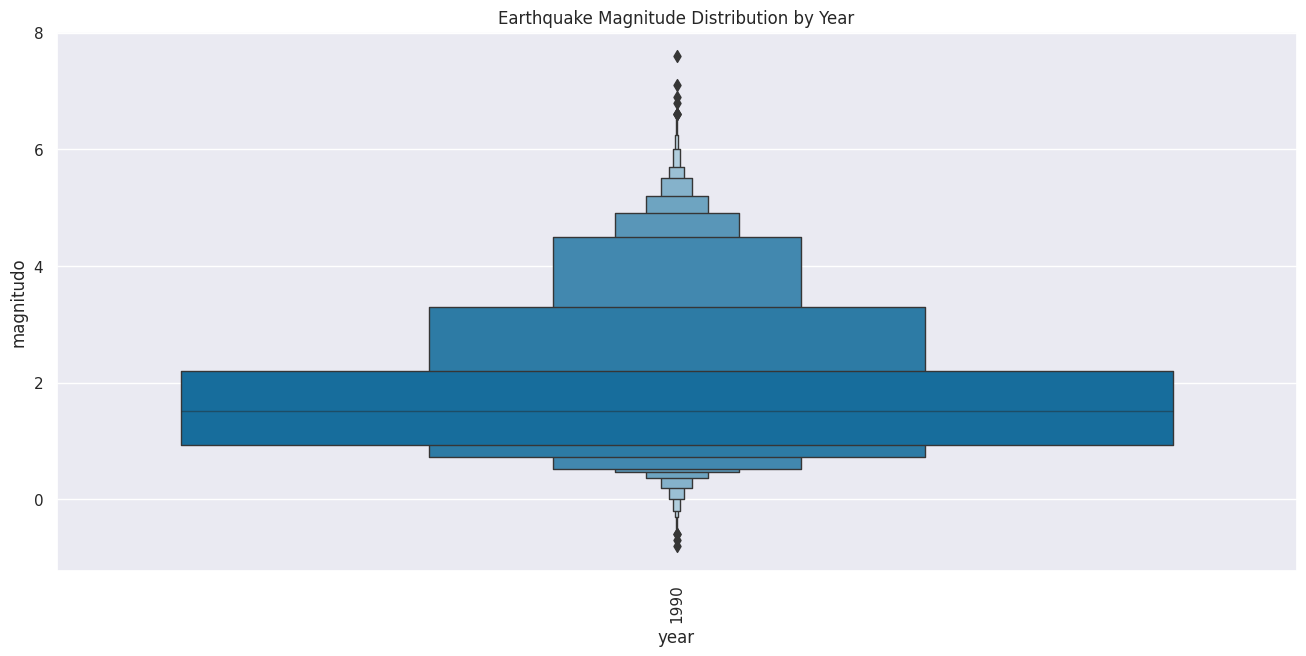

In [ ]:
# Visualize earthquake magnitude distribution by year
plt.figure(figsize=(16, 7))
sns.boxenplot(df, x="year", y="magnitudo", linewidth=1)
plt.xticks(rotation=90)
plt.title("Earthquake Magnitude Distribution by Year")
plt.show()

In [ ]:
# Calculate the magnitudo by month
magnitudo_by_year = df.groupby('year')['magnitudo'].mean().reset_index()

# Create a bar plot using Plotly Express
fig = px.bar(magnitudo_by_year, x='year', y='magnitudo',
             title='magnitudo by year',
             labels={'year': 'Year'},
             template='plotly_white')

# Display the plot
fig.show()

In [ ]:
# Calculate the average magnitude by year
magnitude_by_year = df.groupby('year')['magnitudo'].mean().reset_index()

# Create a line plot using Plotly Express
fig = px.line(magnitude_by_year, x='year', y='magnitudo',
              title='Average Magnitude of Earthquakes by Year',
              labels={'year': 'Year', 'magnitudo': 'Average Magnitude'},
              template='plotly_white')

# Display the plot
fig.show()

In [ ]:
# Calculate the average magnitude by month
magnitude_by_month = df.groupby('month')['magnitudo'].mean().reset_index()

# Create a line plot using Plotly Express
fig = px.line(magnitude_by_month, x='month', y='magnitudo',
              title='Average Magnitude of Earthquakes by month',
              labels={'month': 'Month', 'magnitudo': 'Average Magnitude'},
              template='plotly_white')

# Display the plot
fig.show()

In [ ]:
# Calculate the average magnitude by month
magnitude_by_month_name = df.groupby('month_name')['magnitudo'].mean().reset_index()

# Create a line plot using Plotly Express
fig = px.line(magnitude_by_month_name, x='month_name', y='magnitudo',
              title='Average Magnitude of Earthquakes by month',
              labels={'month_name': 'Month_name', 'magnitudo': 'Average Magnitude'},
              template='plotly_white')

# Display the plot
fig.show()

In [ ]:
# Calculate the average magnitude by day_of_month
magnitude_by_day_of_month = df.groupby('day_of_month')['magnitudo'].mean().reset_index()

# Create a line plot using Plotly Express
fig = px.line(magnitude_by_day_of_month, x='day_of_month', y='magnitudo',
              title='Average Magnitude of Earthquakes by month',
              labels={'month_name': 'Month_name', 'magnitudo': 'Average Magnitude'},
              template='plotly_white')

# Display the plot
fig.show()

In [ ]:
# Calculate the value counts for each unique value in the 'place' column
top10_place = df['place'].value_counts()[:10]

# Create a bar plot using Plotly Express
# y-axis: Count of each place, x-axis: place,
# color-coded by job titles and using a color palette
fig = px.bar(
    y=top10_place.values,  # y-values: count of each place
    x=top10_place.index,   # x-values: job titles
    color=top10_place.index,  # Color the bars based on place
    color_discrete_sequence=px.colors.sequential.PuBuGn,  # Set color palette
    text=top10_place.values,  # Display the count values on top of the bars
    title='Top 10 place',  # Set the title of the plot
    template='plotly_white'  # Use a white template for the plot
)

# Update the layout of the plot
fig.update_layout(
    title_text='place Distribution',  # Set the title of the plot
    height=700,  # Set the height of the plot
    xaxis_title="place",  # Label for the x-axis
    yaxis_title="Count",  # Label for the y-axis
    font=dict(size=17, family="Franklin Gothic")  # Set the font size and family for the text
)

# Display the plot

In [ ]:
# Calculate the value counts for each unique value in the 'data_type' column
top10_data_type = df['data_type'].value_counts()[:10]

# Create a bar plot using Plotly Express
# y-axis: Count of each data type, x-axis: Data types,
# color-coded by data types and using a color palette
fig = px.bar(
    y=top10_data_type.values,  # y-values: count of each data type
    x=top10_data_type.index,   # x-values: data types
    color=top10_data_type.index,  # Color the bars based on data types
    color_discrete_sequence=px.colors.sequential.PuBuGn,  # Set color palette
    text=top10_data_type.values,  # Display the count values on top of the bars
    title='Top 10 Data Types',  # Set the title of the plot
    template='plotly_white'  # Use a white template for the plot
)

# Update the layout of the plot
fig.update_layout(
    title_text='Data Type Distribution',  # Set the title of the plot
    height=700,  # Set the height of the plot
    xaxis_title="Data Type",  # Label for the x-axis
    yaxis_title="Count",  # Label for the y-axis
    font=dict(size=17, family="Franklin Gothic")  # Set the font size and family for the text
)

# Display the plot
fig.show()

In [ ]:
# Calculate the value counts for each unique value in the 'status' column
top10_status = df['status'].value_counts()[:6]

# Create a bar plot using Plotly Express
# y-axis: Count of each status, x-axis: Statuses,
# color-coded by statuses and using a color palette
fig = px.bar(
    y=top10_status.values,  # y-values: count of each status
    x=top10_status.index,   # x-values: statuses
    color=top10_status.index,  # Color the bars based on statuses
    color_discrete_sequence=px.colors.sequential.PuBuGn,  # Set color palette
    text=top10_status.values,  # Display the count values on top of the bars
    title='Top 10 Statuses',  # Set the title of the plot
    template='plotly_white'  # Use a white template for the plot
)

# Update the layout of the plot
fig.update_layout(
    title_text='Status Distribution',  # Set the title of the plot
    height=700,  # Set the height of the plot
    xaxis_title="Status",  # Label for the x-axis
    yaxis_title="Count",  # Label for the y-axis
    font=dict(size=17, family="Franklin Gothic")  # Set the font size and family for the text
)

# Display the plot
fig.show()

In [ ]:
# Calculate the value counts for each unique value in the 'state' column
top10_states = df['state'].value_counts()[:10]

# Create a bar plot using Plotly Express
# y-axis: Count of each state, x-axis: States,
# color-coded by states and using a color palette
fig = px.bar(
    y=top10_states.values,  # y-values: count of each state
    x=top10_states.index,   # x-values: states
    color=top10_states.index,  # Color the bars based on states
    color_discrete_sequence=px.colors.sequential.PuBuGn,  # Set color palette
    text=top10_states.values,  # Display the count values on top of the bars
    title='Top 10 States with Highest Occurrences',  # Set the title of the plot
    template='plotly_white'  # Use a white template for the plot
)

# Update the layout of the plot
fig.update_layout(
    title_text='Distribution of Earthquake Occurrences by State',  # Set the title of the plot
    height=700,  # Set the height of the plot
    xaxis_title="State",  # Label for the x-axis
    yaxis_title="Count",  # Label for the y-axis
    font=dict(size=17, family="Franklin Gothic")  # Set the font size and family for the text
)

# Display the plot
fig.show()

In [ ]:
# Calculate the value counts for each unique value in the 'year' column
year_counts = df['year'].value_counts()

# Sort the years in ascending order
sorted_years = year_counts.sort_index()

# Create a bar plot using Plotly Express
fig = px.bar(
    x=sorted_years.index,   # x-values: years
    y=sorted_years.values,  # y-values: count of occurrences
    color=sorted_years.index,  # Color the bars based on years
    color_discrete_sequence=px.colors.sequential.PuBuGn,  # Set color palette
    text=sorted_years.values,  # Display the count values on top of the bars
    title='Earthquake Occurrences by Year',  # Set the title of the plot
    template='plotly_dark'  # Use a dark template for the plot
)

# Update the layout of the plot
fig.update_layout(
    title_text='Distribution of Earthquake Occurrences by Year',  # Set the title of the plot
    height=700,  # Set the height of the plot
    xaxis_title="Year",  # Label for the x-axis
    yaxis_title="Count",  # Label for the y-axis
    font=dict(size=17, family="Franklin Gothic")  # Set the font size and family for the text
)

# Display the plot
fig.show()

In [ ]:
# Calculate the value counts for each unique value in the 'month_name' column
month_counts = df['month_name'].value_counts()

# Create a bar plot using Plotly Express
fig = px.bar(
    x=month_counts.index,   # x-values: month names
    y=month_counts.values,  # y-values: count of occurrences
    color=month_counts.index,  # Color the bars based on month names
    color_discrete_sequence=px.colors.sequential.PuBuGn,  # Set color palette
    text=month_counts.values,  # Display the count values on top of the bars
    title='Earthquake Occurrences by Month',  # Set the title of the plot
    template='plotly_dark'  # Use a dark template for the plot
)

# Update the layout of the plot
fig.update_layout(
    title_text='Distribution of Earthquake Occurrences by Month',  # Set the title of the plot
    height=700,  # Set the height of the plot
    xaxis_title="Month",  # Label for the x-axis
    yaxis_title="Count",  # Label for the y-axis
    font=dict(size=17, family="Franklin Gothic")  # Set the font size and family for the text
)

# Display the plot
fig.show()

In [ ]:
# Select the top 10 magnitudes in the DataFrame
top10_magnitudes = df['magnitudo'].sort_values(ascending=False).head(10)

# Create a bar plot using Plotly Express
# y-axis: Magnitude values, x-axis: Index of the top 10 magnitudes,
# color-coded by the index, and using a color palette
fig = px.bar(
    y=top10_magnitudes.values,  # y-values: top 10 magnitudes
    x=top10_magnitudes.index,   # x-values: indices of the top 10 magnitudes
    color=top10_magnitudes.index,  # Color the bars based on the indices
    color_discrete_sequence=px.colors.sequential.PuBuGn,  # Set color palette
    text=top10_magnitudes.values,  # Display the magnitude values on top of the bars
    title='Top 10 Magnitudes',  # Set the title of the plot
    template='plotly_dark'  # Use a dark template for the plot
)

# Update the layout of the plot
fig.update_layout(
    title_text='Magnitude Distribution',  # Set the title of the plot
    height=700,  # Set the height of the plot
    xaxis_title="Index",  # Label for the x-axis
    yaxis_title="Magnitude",  # Label for the y-axis
    font=dict(size=17, family="Franklin Gothic")  # Set the font size and family for the text
)

# Display the plot
fig.show()


# Corelation

In [ ]:
# Select columns with object (categorical) data types
num_cols = df.select_dtypes(include='object').columns.tolist()

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to the selected numerical columns
for x in num_cols:
    df[x] = le.fit_transform(df[x])

# Now, your categorical columns (excluding column 0) have been converted to numerical values

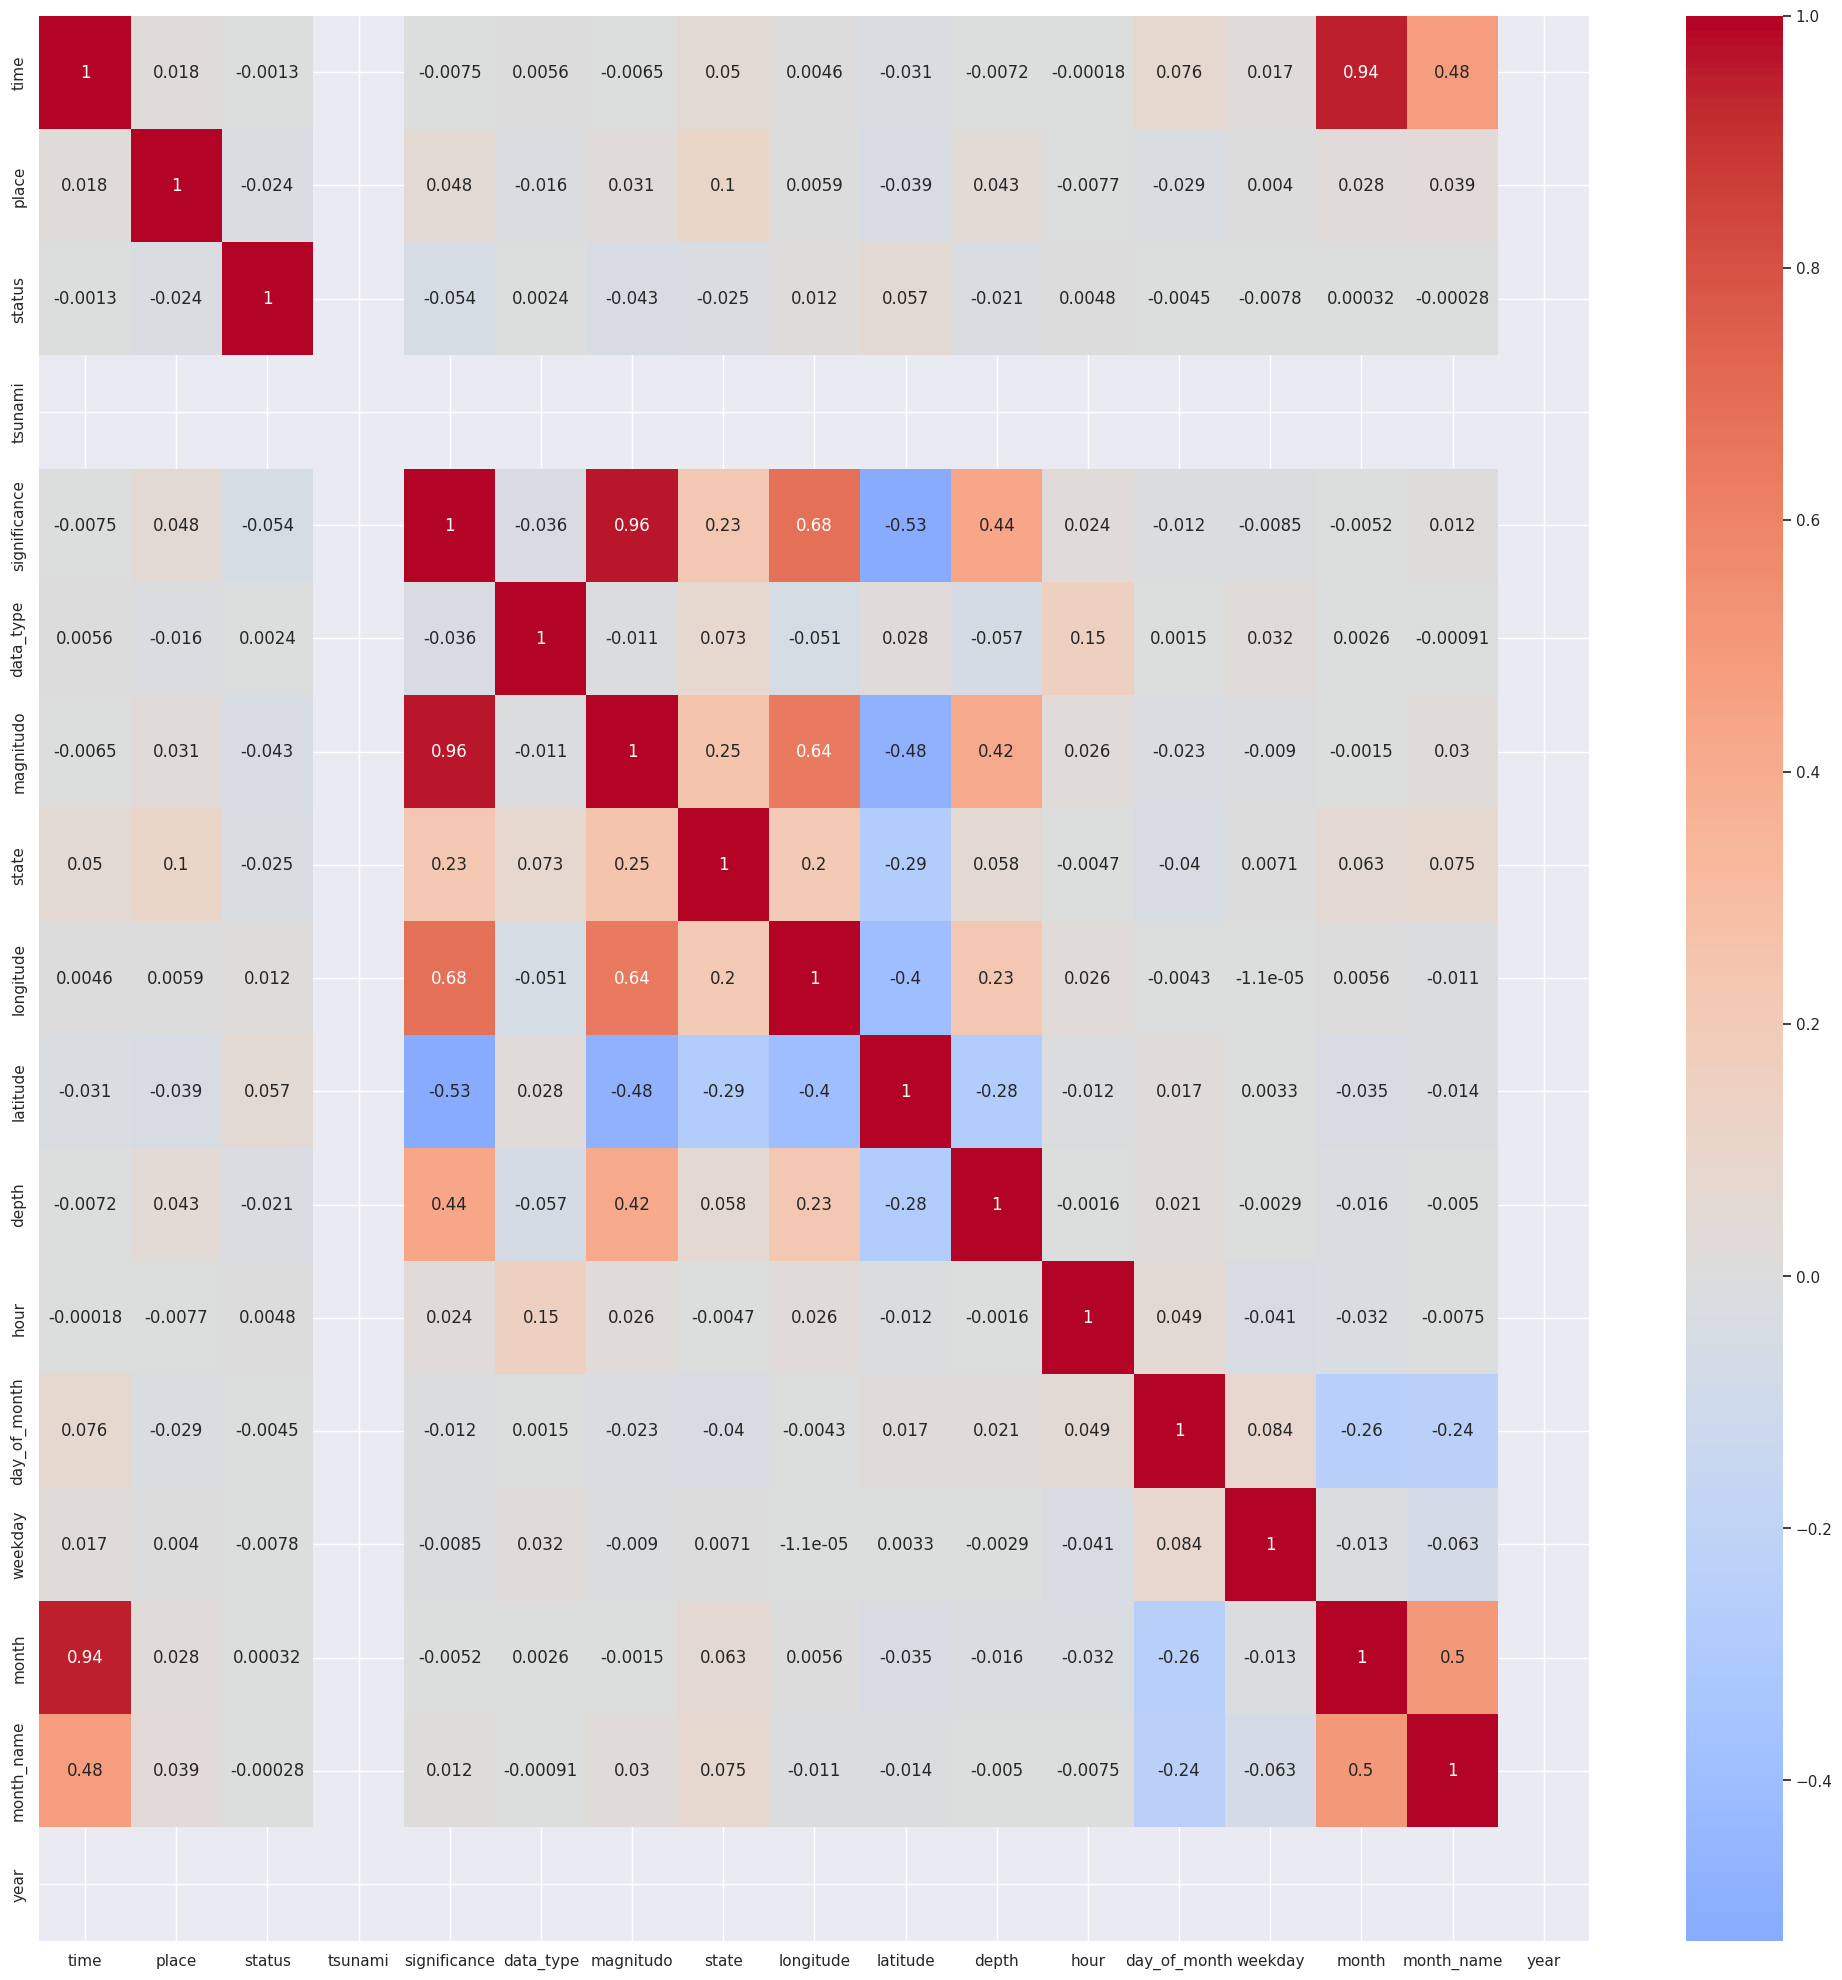

In [ ]:
# Calculate the correlation matrix and visualize it as a heatmap
Corr_Matrix = df.corr()

# Set up the figure and plot the heatmap
plt.figure(figsize=(25, 25))
sns.heatmap(Corr_Matrix, annot=True, cmap='coolwarm', center=0)
plt.show()

In [ ]:
# Display the top 5 features most positively correlated with 'magnitudo'
print('Top 5 Most Positively Correlated to Magnitude')
Corr_Matrix['magnitudo'].sort_values(ascending=False).head(5)

Top 5 Most Positively Correlated to Magnitude


magnitudo       1.000000
significance    0.961306
longitude       0.641006
depth           0.418408
state           0.249683
Name: magnitudo, dtype: float64

In [ ]:
# Display the top 5 features most negatively correlated with 'magnitudo'
print('Top 5 Most Negatively Correlated to Magnitude')
Corr_Matrix['magnitudo'].sort_values(ascending=True).head(5)

Top 5 Most Negatively Correlated to Magnitude


latitude       -0.475156
status         -0.043457
day_of_month   -0.022736
data_type      -0.011328
weekday        -0.008973
Name: magnitudo, dtype: float64